In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Q1 Read the input file and check the data dimension

In [0]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [2]:
credit=pd.read_csv("german_credit.csv")
credit.ndim

2

In [13]:
credit.describe()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.300000,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.458487,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,0.000000,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,1.000000,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,1.000000,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [5]:
credit.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [0]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [0]:
# Print Shape of model data

(500, 61)

In [6]:
credit.shape

(1000, 21)

In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [14]:
categorical_feature_mask = credit.dtypes==object
categorical_cols = credit.columns[categorical_feature_mask]
dummies=pd.get_dummies(credit[categorical_cols])
dummies.head()

,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,1
1,1,0,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,1,0,0,1
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1


### Check for highly correlated variables but don't required any treatment for this use case

                             default  duration_in_month  credit_amount  \
default                     1.000000           0.214927       0.154739   
duration_in_month           0.214927           1.000000       0.624984   
credit_amount               0.154739           0.624984       1.000000   
installment_as_income_perc  0.072404           0.074749      -0.271316   
present_res_since           0.002967           0.034067       0.028926   
age                        -0.091127          -0.036136       0.032716   
credits_this_bank          -0.045732          -0.011284       0.020795   
people_under_maintenance   -0.003015          -0.023834       0.017142   

                            installment_as_income_perc  present_res_since  \
default                                       0.072404           0.002967   
duration_in_month                             0.074749           0.034067   
credit_amount                                -0.271316           0.028926   
installment_as_income_per

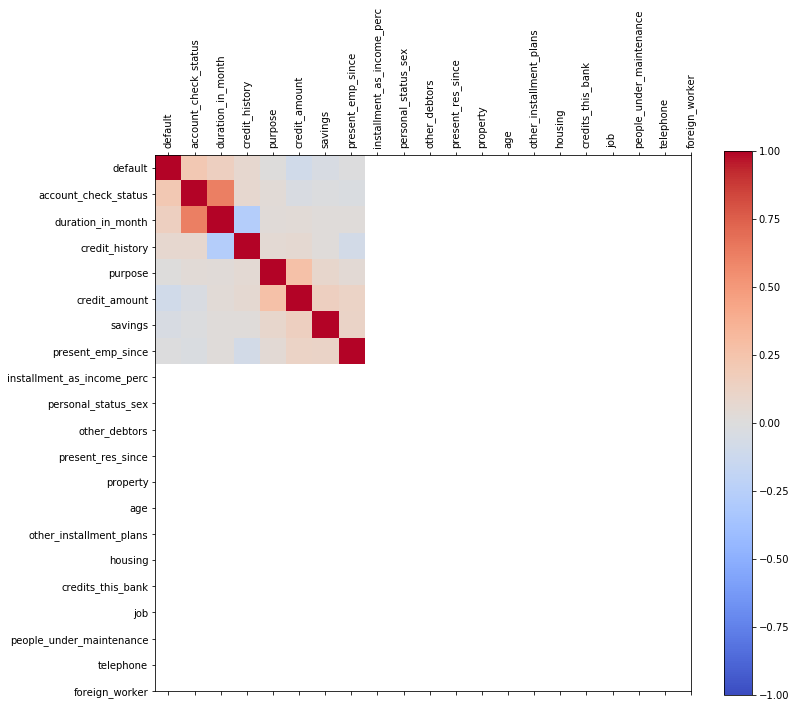

In [17]:
corr = credit.corr()
print(corr)
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(credit.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(credit.columns)
ax.set_yticklabels(credit.columns)
plt.show()

### Drop the original variables which are converted to dummy

In [19]:
credit_dummy=pd.concat([credit,dummies],axis=1)
credit_dummy=credit_dummy.drop(columns=categorical_cols)
print(credit_dummy.shape)
credit_dummy.head()

(1000, 62)


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,0,6,1169,4,4,67,2,1,0,1,...,1,0,0,1,0,0,0,1,0,1
1,1,48,5951,2,2,22,1,1,1,0,...,1,0,0,1,0,0,1,0,0,1
2,0,12,2096,2,3,49,1,2,0,0,...,1,0,0,0,0,1,1,0,0,1
3,0,42,7882,2,4,45,1,2,0,1,...,0,0,0,1,0,0,1,0,0,1
4,1,24,4870,3,4,53,2,2,0,1,...,0,0,0,1,0,0,1,0,0,1


### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [20]:
X = credit_dummy.drop(columns="default")
y = credit_dummy["default"]

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,...,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,...,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,...,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [21]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

print("Data in Training:",X_train.shape)
print("Data in Test:",X_test.shape)

Data in Training: (700, 61)
Data in Test: (300, 61)


### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(max_depth=10,n_estimators=500, random_state=9999, criterion="entropy", n_jobs=2)
forest2= forest.fit(X,y)
forest2

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [24]:
pred = forest.predict(X_test)
print(pred)

[0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0
 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 0 0]


In [25]:
print(forest2.predict)

<bound method ForestClassifier.predict of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)>


### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, pred)
print(cm)

[[216   0]
 [ 15  69]]


In [27]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
print(forest2.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, pred))

0.95
[[216   0]
 [ 15  69]]


### Q6 Show the list of the features importance( 1 Marks)

In [29]:
importances = pd.DataFrame(forest.feature_importances_, index = X_train.columns,columns=['Importance']).sort_values('Importance',ascending=False)
importances

,Importance
credit_amount,0.091178
duration_in_month,0.079682
account_check_status_no checking account,0.076080
age,0.074525
account_check_status_< 0 DM,0.040943
installment_as_income_perc,0.030769
present_res_since,0.027878
credit_history_critical account/ other credits existing (not at this bank),0.025760
savings_... < 100 DM,0.021865
credits_this_bank,0.018104


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [31]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [32]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [33]:
fro_k=[]

ger_kflod=KFold(n_splits=num_folds,random_state=seed)

for train,_ in ger_kflod.split(X_train,y_train):
    t1 = forest.fit(X_train.iloc[train,:], y_train.iloc[train])
    fro_k.append(t1.score(X_test , y_test))

In [34]:
col=[]
for i in range(1,11):
    j='Fold '+ str(i)
    col.append(j)
Model_score_KFold=pd.DataFrame(fro_k).T
Model_score_KFold.columns=col
print('Model Score for 10 Folds are listed blow:')
Model_score_KFold

Model Score for 10 Folds are listed blow:


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Fold 6,Fold 7,Fold 8,Fold 9,Fold 10
0,0.746667,0.756667,0.74,0.743333,0.73,0.743333,0.74,0.736667,0.736667,0.736667


In [0]:
#Calculate Mean score

In [37]:
avg_score = np.mean(fro_k)
print(avg_score)

0.7409999999999999


In [0]:
# Calculate score standard deviation using std()

In [39]:
std = np.std(fro_k)
std

0.006839428176227739

# Q8 Print the confusion matrix( 1 Marks)

In [43]:
fro_k1=[]

kflod=KFold(n_splits=10,random_state=77)
i=1
for train,_ in ger_kflod.split(X_train,y_train):
    clf_g = forest.fit(X_train.iloc[train,:], y_train.iloc[train])
    y_predict = forest2.predict(X_test)
    i=0+i
    print('Confusion matrics for Fold'+str(i),':\n',metrics.confusion_matrix(y_test, y_predict))
    i=i+1

Confusion matrics for Fold1 :
 [[199  17]
 [ 59  25]]
Confusion matrics for Fold2 :
 [[198  18]
 [ 55  29]]
Confusion matrics for Fold3 :
 [[196  20]
 [ 58  26]]
Confusion matrics for Fold4 :
 [[200  16]
 [ 61  23]]
Confusion matrics for Fold5 :
 [[199  17]
 [ 64  20]]
Confusion matrics for Fold6 :
 [[199  17]
 [ 60  24]]
Confusion matrics for Fold7 :
 [[200  16]
 [ 62  22]]
Confusion matrics for Fold8 :
 [[199  17]
 [ 62  22]]
Confusion matrics for Fold9 :
 [[197  19]
 [ 60  24]]
Confusion matrics for Fold10 :
 [[197  19]
 [ 60  24]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [45]:
y_predict=forest2.predict(X_test)
from sklearn.metrics import classification_report

print('Classification accuracy and sensitivity as shown below:')
pre_dat=pd.DataFrame(classification_report(y_test,y_predict,output_dict=True)).T
pre_dat

Classification accuracy and sensitivity as shown below:


,f1-score,precision,recall,support
0,0.832981,0.766537,0.912037,216.0
1,0.377953,0.558140,0.285714,84.0
micro avg,0.736667,0.736667,0.736667,300.0
macro avg,0.605467,0.662338,0.598876,300.0
weighted avg,0.705573,0.708186,0.736667,300.0


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [47]:
#Hint: Use roc_curve

import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

In [ ]:
# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [ ]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
